In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/usr0/home/naveenr/projects/patient_provider')

In [3]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import argparse
import secrets
import json
import matplotlib as mpl

In [4]:
from patient.simulator import Simulator
from patient.policy import *
from patient.utils import get_results_matching_parameters

In [5]:
plt.style.use('ggplot')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.style.use('default')

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

plt.rcParams['savefig.bbox'] = 'tight'
shapes = ['P','o','v','D','s']

## Online Matching Plots

In [5]:
res = get_results_matching_parameters("online_baseline","",{'num_patients': 10, 'num_providers': 10,'provider_capacity': 4})

alpha_lambda_data = {}

for i in res[0]['alpha_lambda_reentry_waittimes']:
    if 'gaps' in i:
        i['waittimes'] = i['gaps']

for key in ['matches','utilities','gaps','waittimes']:
    for i in res[0]['alpha_lambda_reentry_{}'.format(key)]:
        alpha = i['alpha']
        lamb = i['lamb']
        if (alpha,lamb) not in alpha_lambda_data:
            alpha_lambda_data[(alpha,lamb)] = {}
        alpha_lambda_data[(alpha,lamb)][key] = i[key]

for (alpha,lamb) in alpha_lambda_data:
    matches = np.mean(alpha_lambda_data[(alpha,lamb)]['matches'])
    utilities = round(np.mean(alpha_lambda_data[(alpha,lamb)]['utilities']),2)
    gaps = np.mean(alpha_lambda_data[(alpha,lamb)]['gaps'])
    waittimes = np.mean(alpha_lambda_data[(alpha,lamb)]['waittimes'])

    print("({},{}) \t\t Matches {} \t Utilities {} \t Gaps  {} \tWaittimes {}".format("{:.2f}".format(alpha),"{:.2f}".format(lamb),matches,"{:.2f}".format(utilities),gaps,waittimes))

(0.00,0.00) 		 Matches 8.1 	 Utilities 0.74 	 Gaps  0.45 	Waittimes 0.11
(0.25,0.00) 		 Matches 8.0 	 Utilities 0.75 	 Gaps  0.45 	Waittimes 0.11
(0.50,0.00) 		 Matches 7.8 	 Utilities 0.74 	 Gaps  0.4 	Waittimes 0.11
(1.00,0.00) 		 Matches 7.4 	 Utilities 0.70 	 Gaps  0.3 	Waittimes 0.11
(5.00,0.00) 		 Matches 0.0 	 Utilities 0.56 	 Gaps  0.0 	Waittimes 0.6
(10.00,0.00) 		 Matches 0.0 	 Utilities 0.56 	 Gaps  0.0 	Waittimes 0.6
(0.00,0.25) 		 Matches 8.2 	 Utilities 0.74 	 Gaps  0.5 	Waittimes 0.11
(0.25,0.25) 		 Matches 8.1 	 Utilities 0.72 	 Gaps  0.425 	Waittimes 0.11
(0.50,0.25) 		 Matches 7.9 	 Utilities 0.71 	 Gaps  0.4 	Waittimes 0.11
(1.00,0.25) 		 Matches 7.8 	 Utilities 0.71 	 Gaps  0.325 	Waittimes 0.13
(5.00,0.25) 		 Matches 6.0 	 Utilities 0.72 	 Gaps  0.25 	Waittimes 0.2
(10.00,0.25) 		 Matches 0.0 	 Utilities 0.56 	 Gaps  0.0 	Waittimes 0.6
(0.00,0.50) 		 Matches 8.3 	 Utilities 0.74 	 Gaps  0.525 	Waittimes 0.11
(0.25,0.50) 		 Matches 8.1 	 Utilities 0.71 	 Gaps  0.425

In [ ]:
random_results = 
for key in ['matches','utilities','gaps','waittimes']:
    for i in res[0]['alpha_lambda_reentry_{}'.format(key)]:
        alpha = i['alpha']
        lamb = i['lamb']
        if (alpha,lamb) not in alpha_lambda_data:
            alpha_lambda_data[(alpha,lamb)] = {}
        alpha_lambda_data[(alpha,lamb)][key] = i[key]


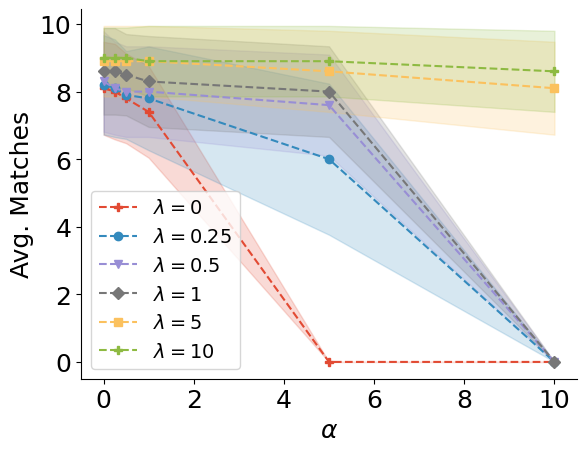

In [19]:
# Impac to \alpha on matches 
mean_by_lamb = {}
std_by_lamb = {}
value_by_lamb = {}
alpha_values = []
for (alpha,lamb) in alpha_lambda_data:
    matches = alpha_lambda_data[(alpha,lamb)]['matches']
    if lamb not in value_by_lamb:
        value_by_lamb[lamb] = []
    value_by_lamb[lamb].append((alpha,matches))
    alpha_values.append(alpha) 
alpha_values = sorted(list(set(alpha_values)))

for lamb in value_by_lamb:
    mean_by_lamb[lamb] = np.array([np.mean(i[1]) for i in sorted(value_by_lamb[lamb],key=lambda k: k[0])])
    std_by_lamb[lamb] = np.array([np.std(i[1]) for i in sorted(value_by_lamb[lamb],key=lambda k: k[0])])
for i,lamb in enumerate(sorted(list(value_by_lamb.keys()))):
    plt.plot(alpha_values,mean_by_lamb[lamb],'{}--'.format(shapes[i%len(shapes)]),color=colors[i],label="$\\lambda={}$".format(lamb)) 
    plt.fill_between(alpha_values, mean_by_lamb[lamb] - std_by_lamb[lamb], mean_by_lamb[lamb] + std_by_lamb[lamb], alpha=0.2,  color=colors[i])
plt.xlabel("$\\alpha$")
plt.ylabel("Avg. Matches")
plt.legend()

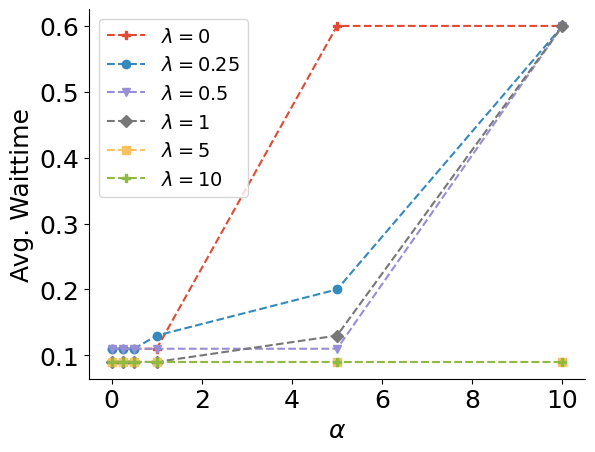

In [21]:
# Impac to \alpha on matches 
mean_by_lamb = {}
std_by_lamb = {}
value_by_lamb = {}
alpha_values = []
for (alpha,lamb) in alpha_lambda_data:
    matches = alpha_lambda_data[(alpha,lamb)]['waittimes']
    if lamb not in value_by_lamb:
        value_by_lamb[lamb] = []
    value_by_lamb[lamb].append((alpha,matches))
    alpha_values.append(alpha) 
alpha_values = sorted(list(set(alpha_values)))

for lamb in value_by_lamb:
    mean_by_lamb[lamb] = np.array([np.mean(i[1]) for i in sorted(value_by_lamb[lamb],key=lambda k: k[0])])
    std_by_lamb[lamb] = np.array([np.std(i[1]) for i in sorted(value_by_lamb[lamb],key=lambda k: k[0])])
for i,lamb in enumerate(sorted(list(value_by_lamb.keys()))):
    plt.plot(alpha_values,mean_by_lamb[lamb],'{}--'.format(shapes[i%len(shapes)]),color=colors[i],label="$\\lambda={}$".format(lamb)) 
    # plt.fill_between(alpha_values, mean_by_lamb[lamb] - std_by_lamb[lamb], mean_by_lamb[lamb] + std_by_lamb[lamb], alpha=0.2,  color=colors[i])
plt.xlabel("$\\alpha$")
plt.ylabel("Avg. Waittime")
plt.legend()

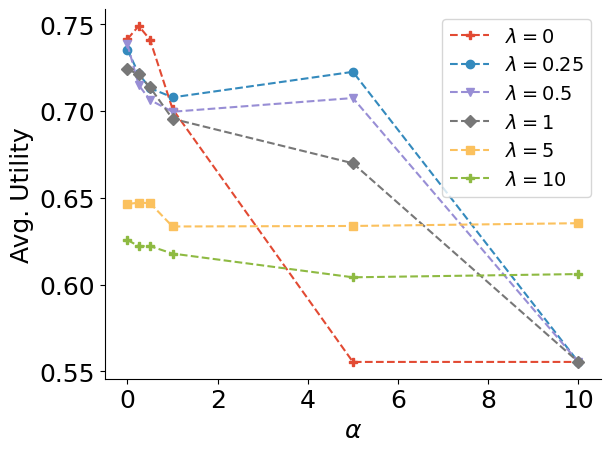

In [22]:
# Impac to \alpha on matches 
mean_by_lamb = {}
std_by_lamb = {}
value_by_lamb = {}
alpha_values = []
for (alpha,lamb) in alpha_lambda_data:
    matches = alpha_lambda_data[(alpha,lamb)]['utilities']
    if lamb not in value_by_lamb:
        value_by_lamb[lamb] = []
    value_by_lamb[lamb].append((alpha,matches))
    alpha_values.append(alpha) 
alpha_values = sorted(list(set(alpha_values)))

for lamb in value_by_lamb:
    mean_by_lamb[lamb] = np.array([np.mean(i[1]) for i in sorted(value_by_lamb[lamb],key=lambda k: k[0])])
    std_by_lamb[lamb] = np.array([np.std(i[1]) for i in sorted(value_by_lamb[lamb],key=lambda k: k[0])])
for i,lamb in enumerate(sorted(list(value_by_lamb.keys()))):
    plt.plot(alpha_values,mean_by_lamb[lamb],'{}--'.format(shapes[i%len(shapes)]),color=colors[i],label="$\\lambda={}$".format(lamb)) 
    # plt.fill_between(alpha_values, mean_by_lamb[lamb] - std_by_lamb[lamb], mean_by_lamb[lamb] + std_by_lamb[lamb], alpha=0.2,  color=colors[i])
plt.xlabel("$\\alpha$")
plt.ylabel("Avg. Utility")
plt.legend()

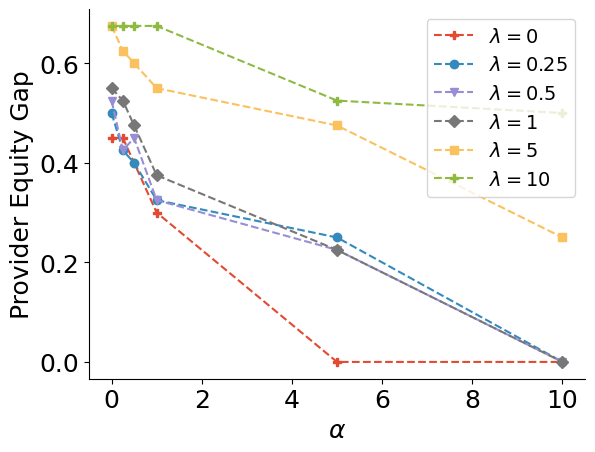

In [27]:
# Impac to \alpha on matches 
mean_by_lamb = {}
std_by_lamb = {}
value_by_lamb = {}
alpha_values = []
for (alpha,lamb) in alpha_lambda_data:
    matches = alpha_lambda_data[(alpha,lamb)]['gaps']
    if lamb not in value_by_lamb:
        value_by_lamb[lamb] = []
    value_by_lamb[lamb].append((alpha,matches))
    alpha_values.append(alpha) 
alpha_values = sorted(list(set(alpha_values)))

for lamb in value_by_lamb:
    mean_by_lamb[lamb] = np.array([np.mean(i[1]) for i in sorted(value_by_lamb[lamb],key=lambda k: k[0])])
    std_by_lamb[lamb] = np.array([np.std(i[1]) for i in sorted(value_by_lamb[lamb],key=lambda k: k[0])])
for i,lamb in enumerate(sorted(list(value_by_lamb.keys()))):
    plt.plot(alpha_values,mean_by_lamb[lamb],'{}--'.format(shapes[i%len(shapes)]),color=colors[i],label="$\\lambda={}$".format(lamb)) 
plt.xlabel("$\\alpha$")
plt.ylabel("Provider Equity Gap")
plt.legend()